# Visualizing Data
Here we look at more possibilities to display and explore data.

## Example per case plots

Sometimes it is nice, to have results for a number of experiments or measurements in a separate plot. The following example generates response times for urls and plots results each. 

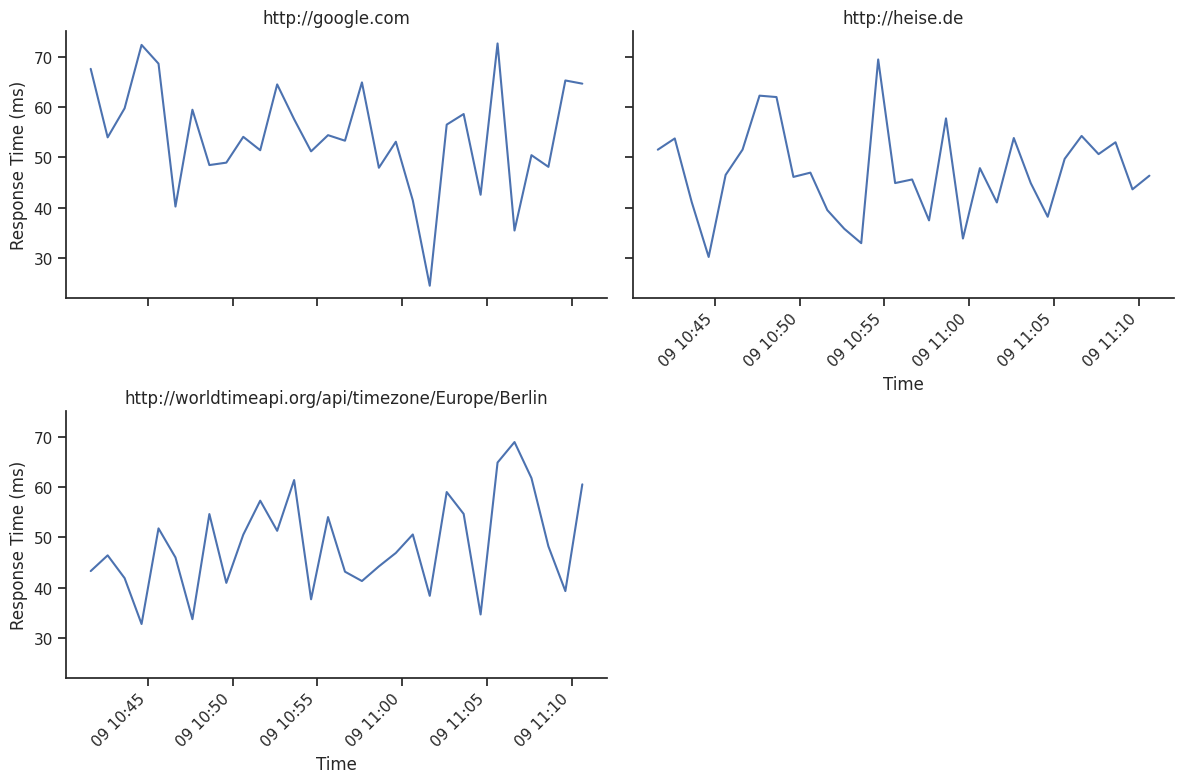

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

# Generate sample data
np.random.seed(0)
num_entries = 30
urls = ['http://google.com', 'http://heise.de', 'http://worldtimeapi.org/api/timezone/Europe/Berlin']
timestamps = [datetime(2024, 6, 9, 10, 41, 38) + timedelta(minutes=i) for i in range(num_entries)]
response_times = np.random.normal(loc=50, scale=10, size=num_entries * len(urls))

data = {
    'url': np.repeat(urls, num_entries),
    'measuretime': timestamps * len(urls),
    'responsetime': response_times
}

df = pd.DataFrame(data)

# Create a FacetGrid
g = sns.FacetGrid(df, col="url", col_wrap=2, height=4, aspect=1.5)
g.map(sns.lineplot, 'measuretime', 'responsetime')

# Adjust the x-axis date formatting for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

g.set_axis_labels("Time", "Response Time (ms)")
g.set_titles(col_template="{col_name}")

plt.tight_layout()
plt.show()

### Tasks
* Load your real data and plot for at least three URLs response times 